In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os, re
from tensorflow.keras import layers, models, regularizers
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn import metrics, preprocessing
from keras.utils.np_utils import to_categorical
from sklearn.utils import shuffle

In [3]:
train_df = pd.read_csv('training_dataset_cubic_phase.csv', sep='\t')
test_df = pd.read_csv('phase_test.csv', sep='\t')

In [7]:
X_test = test_df[["0", "1", "2", "3","4", "5", "6", "7"]]
y_test = test_df['name']

In [9]:
np.shape(train_df[["peak_1", "peak_2", "peak_3", "peak_4","peak_5", "peak_6", "peak_7", "peak_8"]])

(3636, 8)

In [10]:
np.shape(X_test)

(3, 8)

In [55]:
X_test_re = X_test.values.reshape(3,8,1)

In [14]:
encoder = preprocessing.LabelEncoder()
encoder.fit(y_test)
encoded_y = encoder.transform(y_test)

In [35]:
training_data = shuffle(train_df)

X = training_data[["peak_1", "peak_2", "peak_3", "peak_4","peak_5", "peak_6", "peak_7", "peak_8"]]
y = training_data["names"]

In [37]:
X_re = X.values.reshape(3636,8,1)

In [38]:
train_features, test_features, train_labels, test_labels = train_test_split(X_re, 
                                                        y, 
                                                        test_size=0.25, 
                                                        random_state=42)

In [45]:
encoder.fit(train_labels)
encoded_train_labels = encoder.transform(train_labels)
encoder.fit(test_labels)
encoded_test_labels = encoder.transform(test_labels)

In [46]:
X_val = train_features[:500]
partial_X_train = train_features[500:]
y_val = encoded_train_labels[:500]
partial_y_train = encoded_train_labels[500:]

In [50]:
model = models.Sequential()
model.add(layers.Conv1D(filters=20, kernel_size=5, strides=1, padding="same", activation="relu", input_shape=(8,1)))
model.add(layers.MaxPooling1D(1))
model.add(layers.Conv1D(filters=20, kernel_size=5, strides=1, padding="same", activation="relu"))
model.add(layers.MaxPooling1D(1))
model.add(layers.Flatten())
model.add(layers.Dense(1, activation='sigmoid'))

In [52]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

history = model.fit(partial_X_train, partial_y_train, epochs=100, batch_size=10, validation_data=(X_val, y_val))

Train on 2227 samples, validate on 500 samples
Epoch 1/100
2227/2227 [==============================] - 1s 348us/sample - loss: 0.2699 - accuracy: 0.9079 - val_loss: 0.2291 - val_accuracy: 0.8580
Epoch 2/100
2227/2227 [==============================] - 0s 210us/sample - loss: 0.1475 - accuracy: 0.9802 - val_loss: 0.1138 - val_accuracy: 0.9900
Epoch 3/100
2227/2227 [==============================] - 0s 197us/sample - loss: 0.1006 - accuracy: 0.9807 - val_loss: 0.0600 - val_accuracy: 1.0000
Epoch 4/100
2227/2227 [==============================] - 1s 248us/sample - loss: 0.0490 - accuracy: 0.9991 - val_loss: 0.0626 - val_accuracy: 0.9980
Epoch 5/100
2227/2227 [==============================] - 1s 233us/sample - loss: 0.0298 - accuracy: 1.0000 - val_loss: 0.0551 - val_accuracy: 0.9940
Epoch 6/100
2227/2227 [==============================] - 0s 220us/sample - loss: 0.0286 - accuracy: 0.9955 - val_loss: 0.0154 - val_accuracy: 1.0000
Epoch 7/100
2227/2227 [==============================] - 1s

2227/2227 [==============================] - 0s 166us/sample - loss: 0.1246 - accuracy: 0.9726 - val_loss: 0.0100 - val_accuracy: 1.0000
Epoch 55/100
2227/2227 [==============================] - 0s 148us/sample - loss: 0.0064 - accuracy: 1.0000 - val_loss: 0.0066 - val_accuracy: 1.0000
Epoch 56/100
2227/2227 [==============================] - 0s 157us/sample - loss: 0.0049 - accuracy: 1.0000 - val_loss: 0.0050 - val_accuracy: 1.0000
Epoch 57/100
2227/2227 [==============================] - 0s 153us/sample - loss: 0.0046 - accuracy: 1.0000 - val_loss: 0.0044 - val_accuracy: 1.0000
Epoch 58/100
2227/2227 [==============================] - 0s 172us/sample - loss: 0.0036 - accuracy: 1.0000 - val_loss: 0.0047 - val_accuracy: 1.0000
Epoch 59/100
2227/2227 [==============================] - 0s 177us/sample - loss: 0.0038 - accuracy: 1.0000 - val_loss: 0.0035 - val_accuracy: 1.0000
Epoch 60/100
2227/2227 [==============================] - 0s 182us/sample - loss: 0.0037 - accuracy: 1.0000 - val

In [56]:
model.evaluate(X_test_re, encoded_y)

3/3 [==============================] - 0s 0s/sample - loss: 2.5374e-04 - accuracy: 1.0000


[0.0002537441614549607, 1.0]

In [60]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_6 (Conv1D)            (None, 8, 20)             120       
_________________________________________________________________
max_pooling1d_6 (MaxPooling1 (None, 8, 20)             0         
_________________________________________________________________
conv1d_7 (Conv1D)            (None, 8, 20)             2020      
_________________________________________________________________
max_pooling1d_7 (MaxPooling1 (None, 8, 20)             0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 160)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 161       
Total params: 2,301
Trainable params: 2,301
Non-trainable params: 0
____________________________________________________

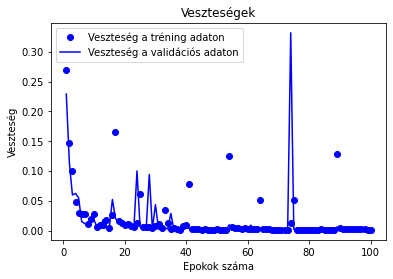

In [57]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'bo', label='Veszteség a tréning adaton')
plt.plot(epochs, val_loss, 'b', label='Veszteség a validációs adaton')
plt.title('Veszteségek')
plt.xlabel('Epokok száma')
plt.ylabel('Veszteség')
plt.legend()
plt.savefig("loss_phase_cubic")
plt.show()

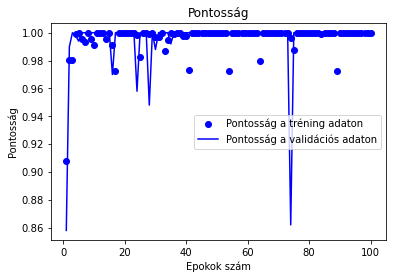

In [58]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, acc, 'bo', label='Pontosság a tréning adaton')
plt.plot(epochs, val_acc, 'b', label='Pontosság a validációs adaton')
plt.title('Pontosság')
plt.xlabel('Epokok szám')
plt.ylabel('Pontosság')
plt.legend()
plt.savefig("acc_phase_cubic")
plt.show()

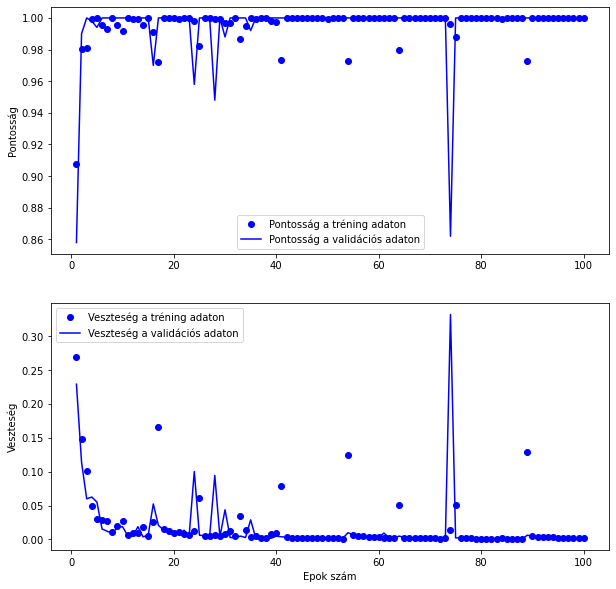

In [59]:
fig, (ax1, ax2) = plt.subplots(2,figsize=(10,10))
ax1.plot(epochs, acc, 'bo', label='Pontosság a tréning adaton')
ax1.plot(epochs, val_acc, 'b', label='Pontosság a validációs adaton')
ax1.set_ylabel('Pontosság')
ax1.legend()
ax2.plot(epochs, loss, 'bo', label='Veszteség a tréning adaton')
ax2.plot(epochs, val_loss, 'b', label='Veszteség a validációs adaton')
ax2.set_xlabel('Epok szám')
ax2.set_ylabel('Veszteség')
ax2.legend()
plt.savefig('phase_one')